In [2]:
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [53]:
# Parameters
class LotkaVolterra:
    def __init__(self, parameters: dict):
        self.a = parameters['a'] # natural growth rate of prey
        self.b = parameters['b'] # natural dying rate of prey due to predation
        self.c = parameters['c'] # natural dying rate of predator
        self.d = parameters['d'] # caught prey per new predator
    
    def dx_dt(self, X: np.array, t: float = 0) -> np.array:
        """ 
        Returns the growth rate of fox and rabbit populations. 

        """
        return np.array( [self.a * X[0] - (self.b * X[0] * X[1]),
                         -self.c * X[1] + (self.d * self.b * X[0] * X[1])] )
    
    def jacobian(self, X: np.array, t: float = 0) -> np.array:
        """
        Returns the Jacobian matrix evaluated in X
        
        """
        return np.array([ [self.a - self.b * X[1], -self.b * X[0]],
                          [self.d * self.b * X[1], -self.c + self.d * self.b * X[0]] ])

    def fixed_points(self) -> List[np.array]:
        X_f1 = np.array([ 0.0, 0.0 ])
        X_f2 = np.array([ self.c / (self.d * self.b), self.a / self.b])
        return self.jacobian(X_f1), self.jacobian(X_f2)
    
    def solve(self, ode: Callable, X0: np.array, t: np.array):
        return ode(self.dx_dt, X0, t)
        
        #self.plot_results(X, t)
        #return integrate.odeint(dx_dt, X0, t, full_output = True)
        
    def plot_results(self, 
                     X: np.array, 
                     t: np.array, 
                     prey_label: str = "Prey", 
                     pred_label: str = "Predator", 
                     title:      str = "Populations Over Time"):
        
        prey, predator = X.T
        fig = plt.figure()
        plt.plot(t, prey, 'r-', label = prey_label)
        plt.plot(t, predator, 'b-', label = pred_label)
        plt.grid()
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Population Size")
        plt.title(title)
        plt.savefig("euler0.jpg")
        plt.show()
        
        

In [54]:
# define parameters and instantiate model
parameters = {
    'a': 1.0,
    'b': 0.1,
    'c': 1.5,
    'd': 0.75
}

ode = integrate.odeint
X0 = np.array([1, 1])


model = LotkaVolterra(parameters)

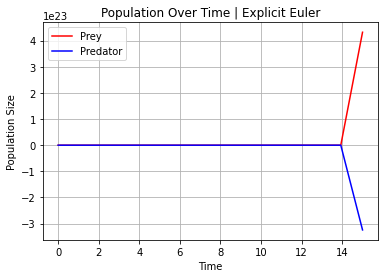

In [55]:
t = np.linspace(0, 15, 15)
X = model.solve(ExplicitEuler, X0, t)
model.plot_results(X, t, title = "Population Over Time | Explicit Euler")


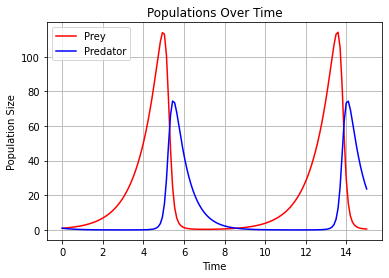

In [34]:
t = np.linspace(0, 15, 150)
X2 = model.solve(ode, X0, t)

In [12]:
def ExplicitEuler(f: Callable, X0: np.array, t: np.array):
    h = (t[-1] + t[0]) / len(t)
    X = np.zeros((len(t), len(X0)))
    X[0] = X0
    for i in range(len(t) - 1):
        X[i + 1] = X[i] + h * f(X[i], t[i])
    return X
        